**Pima Diabetes Prediction:** This Notebook will comprise of Explanatory Data Analysis, of the Pima Diabetes Database, and an Neural Network Model will be implemented to extract features from the dataset and predict the outcome that whether a patient with given attributes is having diabetes or not.

In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading Data

df = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
#Generating Correlation Matrix
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [5]:
#Dimensions of the Dataset
df.shape

(768, 9)

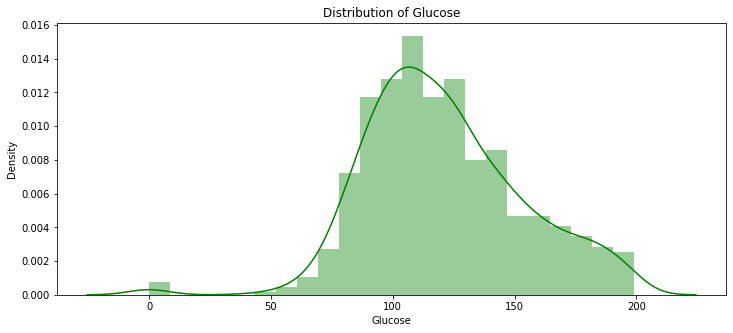

In [6]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Glucose")
ax = sns.distplot(df["Glucose"], color = 'g')

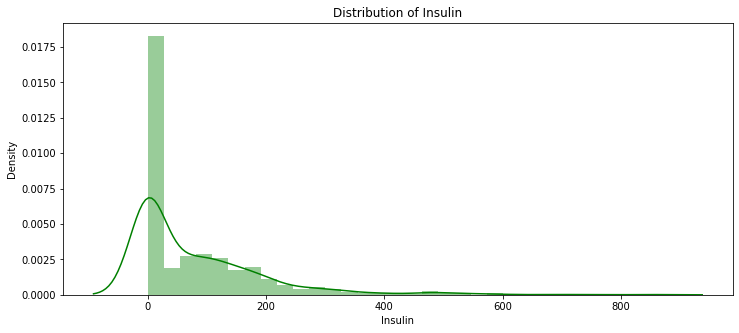

In [7]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Insulin")
ax = sns.distplot(df["Insulin"], color = 'g')

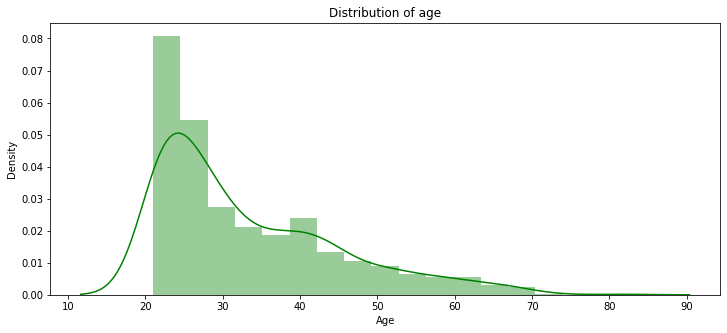

In [8]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(df["Age"], color = 'g')

Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

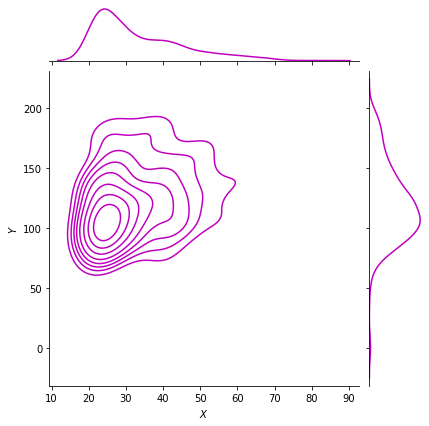

In [9]:
g = sns.jointplot(x="Age", y="Glucose", data = df,kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

<AxesSubplot:>

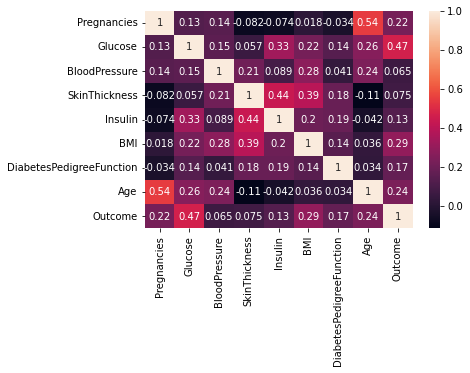

In [10]:
sns.heatmap(df.corr(), annot = True)

In [11]:
Scaler = StandardScaler()

X = df.drop(['Outcome'], axis = 1)
y = df[['Outcome']]
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.1, random_state  = 0)
X_train = Scaler.fit_transform(X_Train)
X_test = Scaler.transform(X_Test)


In [12]:
X_Train.shape

(691, 8)

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [14]:
model = Sequential()

2022-04-23 06:20:33.877238: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [15]:
model = Sequential()

# 1st layer: input_dim=8, 12 nodes, RELU
model.add(Dense(12, input_dim=8, kernel_initializer='random_uniform', activation='relu'))
# 2nd layer: 8 nodes, RELU
model.add(Dropout(0.1))

model.add(Dense(8, kernel_initializer='random_uniform', activation='relu'))
model.add(Dropout(rate=0.1))
# output layer: dim=1, activation sigmoid
model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid' ))

# Compile the model
model.compile(loss='binary_crossentropy',   # since we are predicting 0/1
             optimizer='adam',
             metrics=['accuracy'])

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(X_Train, y_Train, batch_size=100, epochs=150)

2022-04-23 06:20:34.281017: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/150
7/7 [==============================] - 1s 2ms/step - loss: 0.6950 - accuracy: 0.4168
Epoch 2/150
7/7 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.6252
Epoch 3/150
7/7 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.6527
Epoch 4/150
7/7 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.6527
Epoch 5/150
7/7 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.6483
Epoch 6/150
7/7 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.6527
Epoch 7/150
7/7 [==============================] - 0s 2ms/step - loss: 0.6696 - accuracy: 0.6483
Epoch 8/150
7/7 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.6469
Epoch 9/150
7/7 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.6556
Epoch 10/150
7/7 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.6556
Epoch 11/150
7/7 [===========

In [18]:
Y_pred = model.predict(X_Test)